In [1]:
from sklearn.datasets import load_boston
boston=load_boston()
print('boston keys:{}'.format(boston.keys()))
print('boston data shape:{}'.format(boston.data.shape))
print('boston feature names shape:{}'.format(boston.feature_names.shape))

boston keys:dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston data shape:(506, 13)
boston feature names shape:(13,)


In [2]:
import pandas as pd
bostondataframe=pd.DataFrame(boston.data[:20,:],columns=boston.feature_names)
bostonscatter=pd.plotting.scatter_matrix(bostondataframe)

C:\Users\msmpo\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\msmpo\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\msmpo\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


In [11]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [30]:
x,y=mglearn.datasets.load_extended_boston()
print(x.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression().fit(x_train,y_train)
print('accuracy of linear regression model - ',lr.score(x_test,y_test))

(506, 104)
accuracy of linear regression model -  0.6074721959665752


In [37]:

for i in range(6):
    knr=KNeighborsRegressor(n_neighbors=i+1).fit(x_train,y_train)
    print('accuracy of k-neighbour regression model with neighbour {:d}-'.format((i)),knr.score(x_test,y_test))

accuracy of k-neighbour regression model with neighbour 0- 0.6535950313458039
accuracy of k-neighbour regression model with neighbour 1- 0.6479523202979878
accuracy of k-neighbour regression model with neighbour 2- 0.6111335176002934
accuracy of k-neighbour regression model with neighbour 3- 0.6003431656204457
accuracy of k-neighbour regression model with neighbour 4- 0.5586201495910272
accuracy of k-neighbour regression model with neighbour 5- 0.5568528063684597


In [13]:
from sklearn.linear_model import Ridge
rd=Ridge().fit(x_train,y_train)
print('ridge model train score:{:.2f}'.format(rd.score(x_train,y_train)))
print('ridge model test score:{:.2f}'.format(rd.score(x_test,y_test)))
rd=Ridge(alpha=0.1).fit(x_train,y_train)
print('ridge model(alpha=0.1) train score:{:.2f}'.format(rd.score(x_train,y_train)))
print('ridge model(alpha=0.1) test score:{:.2f}'.format(rd.score(x_test,y_test)))
rd=Ridge(alpha=1).fit(x_train,y_train)
print('ridge model(alpha=1) train score:{:.2f}'.format(rd.score(x_train,y_train)))
print('ridge model(alpha=1) test score:{:.2f}'.format(rd.score(x_test,y_test)))
rd=Ridge(alpha=10).fit(x_train,y_train)
print('ridge model(alpha=10) train score:{:.2f}'.format(rd.score(x_train,y_train)))
print('ridge model(alpha=10) test score:{:.2f}'.format(rd.score(x_test,y_test)))




ridge model train score:0.89
ridge model test score:0.75
ridge model(alpha=0.1) train score:0.93
ridge model(alpha=0.1) test score:0.77
ridge model(alpha=1) train score:0.89
ridge model(alpha=1) test score:0.75
ridge model(alpha=10) train score:0.79
ridge model(alpha=10) test score:0.64


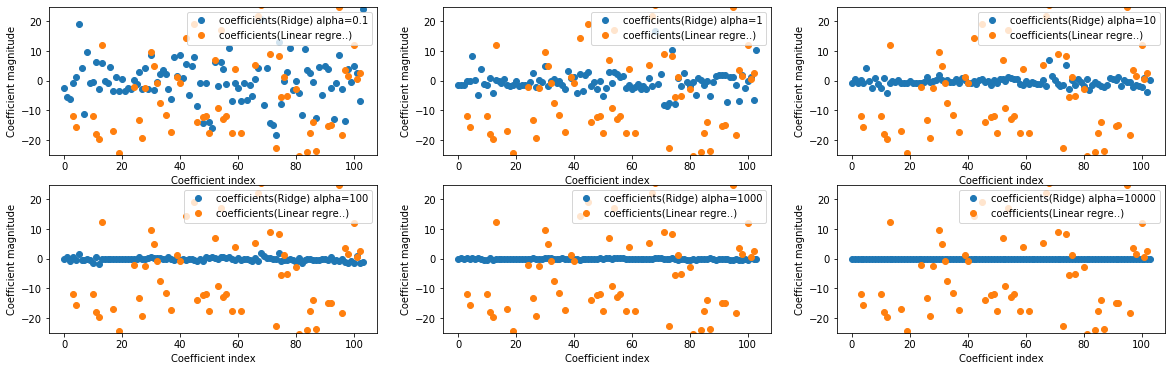

In [25]:
fig,axes=plt.subplots(2,3,figsize=(20,6))
axes=axes.flatten()
for i in range(6):
    rd=Ridge(alpha=10**(i-1)).fit(x_train,y_train)
    axes[i].plot(rd.coef_,'o',label='coefficients(Ridge) alpha={}'.format(10**(i-1)))
    axes[i].plot(lr.coef_,'o',label='coefficients(Linear regre..) ')
    axes[i].set_xlabel("Coefficient index")
    axes[i].set_ylabel("Coefficient magnitude")
    #plt.hlines(0, 0, len(lr.coef_))
    axes[i].set_ylim(-25, 25)
    axes[i].legend(loc='best')

In [15]:
from sklearn.linear_model import Lasso

for i in range(3):
    rd=Ridge(alpha=10**(i-1)).fit(x_train,y_train)
    print('no. of coeficient(Ridge) alpha={} :{}'.format(10**(i-1),np.sum(rd.coef_!=0)))
print('no. of coeficient(Linear Reg) :{}'.format(sum(lr.coef_!=0)))
for i in range(7):
    ls=Lasso(alpha=10**(1-i)).fit(x_train,y_train)
    print('no. of coeficient(Lasso) alpha={} :{}'.format(10**(1-i),np.sum(ls.coef_!=0)))



no. of coeficient(Ridge) alpha=0.1 :104
no. of coeficient(Ridge) alpha=1 :104
no. of coeficient(Ridge) alpha=10 :104
no. of coeficient(Linear Reg) :104
no. of coeficient(Lasso) alpha=10 :0
no. of coeficient(Lasso) alpha=1 :4
no. of coeficient(Lasso) alpha=0.1 :8
no. of coeficient(Lasso) alpha=0.01 :32
no. of coeficient(Lasso) alpha=0.001 :76
no. of coeficient(Lasso) alpha=0.0001 :100
no. of coeficient(Lasso) alpha=1e-05 :104
shape of x_train:(379, 104)


C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  positive)
C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8635616562358, tolerance: 3.233182126649077
  positive)
C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  positive)
C:\Users\msmpo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: